In [1]:
## Imports

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import warnings

sys.path.append("../.")

import handybeam_core
import handybeam_core.world
import handybeam_core.tx_array_library
import handybeam_core.tx_array
import handybeam_core.visualise
import handybeam_core.samplers.lambert_sampler
from handybeam_core.solver import Solver

matplotlib.rcParams['figure.figsize'] = [20,8]

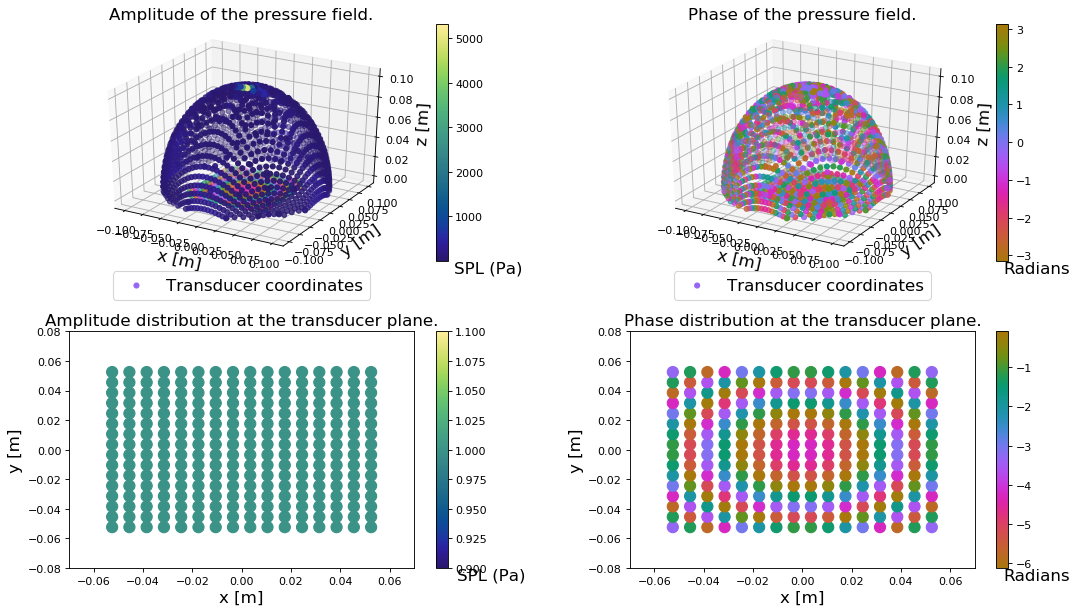

In [2]:
# Initialise the world 

world = handybeam_core.world.World()

# Initialise a solver

solver = Solver(parent = world)

# Add a transmitter array to the world

world.tx_array = handybeam_core.tx_array_library.rectilinear(parent = world)

# Instruct the solver to solve for the activation coefficients

solver.single_focus_solver(x_focus = 0 , y_focus = 0, z_focus = 100e-3)

# Set the size of the sampling grid (along each axis)

N = 300

# Set the grid point spacing before lambert projection

delta = 0.01

# Set the radius of the hemisphere 

radius = 0.11


# Add a rectilinear sampling grid to the world

lamb_sampler = world.add_sampler(handybeam_core.samplers.lambert_sampler.LambertSampler(parent = world,
                                                                origin = np.array((0,0,0)),
                                                                radius = 100e-3,
                                                                required_resolution = 10e-3))

# Propagate the acoustic field

world.propagate()

# Visualise the result

lamb_sampler.visualise_all_in_one()

